In [29]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing,cross_validation
from sklearn.linear_model import LinearRegression
import seaborn as sns
g=pd.read_csv('feeds.csv')
g.rename(columns={'created_at':'DateTime'},inplace=True)
g.rename(columns={'entry_id':'Input Number'},inplace=True)
g.rename(columns={'field1':'Pollution'},inplace=True)
g

,DateTime,Input Number,Pollution
0,2017-08-17 07:59:22 UTC,1,533.0
1,2017-08-17 08:00:03 UTC,2,521.0
2,2017-08-17 08:00:43 UTC,3,509.0
3,2017-08-17 08:01:22 UTC,4,463.0
4,2017-08-17 08:02:01 UTC,5,435.0
5,2017-08-17 08:02:39 UTC,6,430.0
6,2017-08-17 08:03:20 UTC,7,485.0
7,2017-08-17 08:04:08 UTC,8,479.0
8,2017-08-17 08:04:57 UTC,9,395.0
9,2017-08-17 08:05:42 UTC,10,415.0


In [22]:
g['Pollution'].nunique()

235

In [46]:
x=g[g['Pollution']>700]
x

,DateTime,Input Number,Pollution
75,2017-08-17 08:56:13 UTC,76,738.0
76,2017-08-17 08:56:52 UTC,77,749.0
77,2017-08-17 08:57:34 UTC,78,747.0
78,2017-08-17 08:58:17 UTC,79,756.0
79,2017-08-17 08:58:58 UTC,80,758.0
80,2017-08-17 08:59:38 UTC,81,758.0
81,2017-08-17 09:00:24 UTC,82,752.0
82,2017-08-17 09:01:04 UTC,83,740.0
83,2017-08-17 09:01:44 UTC,84,732.0
84,2017-08-17 09:02:26 UTC,85,727.0


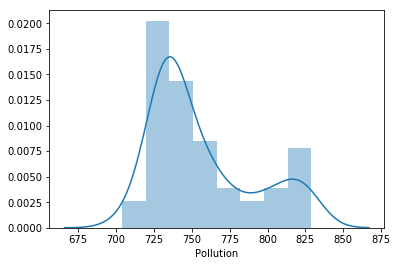

In [31]:
sns.distplot(x['Pollution'])

In [34]:
from sklearn.cross_validation import train_test_split
x.columns

Index(['DateTime', 'Input Number', 'Pollution'], dtype='object')

In [39]:
X=x[['DateTime','Input Number']]
y=x['Pollution']

In [40]:
lm=LinearRegression()

In [43]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=50)